In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Jay\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
data = pd.read_csv("Online Retail Data Set.csv", encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
#df is copy of data and thus we have preserved original data

In [5]:
df = data.copy()

## Data Wrangling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.duplicated().sum() #Count duplicates

5268

### 5268 duplicated rows. Delete these rows

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(536641, 8)

In [11]:
df.describe() #Numeric Statistical Values

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Missing Values

In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

### Replace customerID with 0 where null and description with Unknown

In [13]:
df['CustomerID'] = df['CustomerID'].fillna(0)

In [14]:
df['Description'] = df['Description'].fillna('Unknown')

In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Assigning proper DataTypes
### Change dataType of invoiceDate

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='mixed',dayfirst=True)
df['CustomerID'] = pd.to_numeric(df['CustomerID'])

### Extracting Time,day,month and year from Date 

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
df['Time']= df['InvoiceDate'].dt.time

In [19]:
df['Month']=df['InvoiceDate'].dt.month_name()

In [20]:
df['Year']=df['InvoiceDate'].dt.year

In [21]:
df['Day']=df['InvoiceDate'].dt.day_name()

### Total Sales 

In [22]:
df['TotalSales'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Year,Day,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,20.34


## Structuring

<AxesSubplot:ylabel='UnitPrice'>

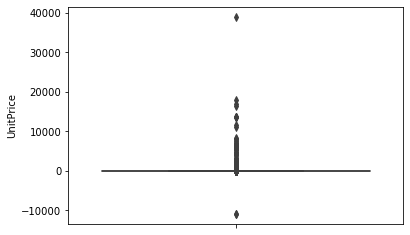

In [23]:
sns.boxplot(y = 'UnitPrice', data=df)

In [24]:
df=df[df['UnitPrice']>0]

In [25]:
df['UnitPrice'].min()

0.001

### Spotted some debt in description

### These are debt which are not required, so we remove them There are some invoices which are debt, which we don't need in our analysis, these invoices are associated with description having word "debt".

In [26]:
df[df['Description'].str.contains('debt', case=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Year,Day,TotalSales
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,0.0,United Kingdom,14:50:00,August,2011,Friday,11062.06


In [27]:
mask = df['Description'].str.contains('debt', case=False)
mask

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Description, Length: 534129, dtype: bool

In [28]:
df=df[~mask] #filtering out debt wala rows

In [29]:
df.shape

(534128, 13)

In [30]:
df=df[df['UnitPrice']>0] #filtering out where unit price is -ve.

In [31]:
df[df['UnitPrice']==df['UnitPrice'].min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Year,Day,TotalSales
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,09:27:00,April,2011,Friday,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,10:13:00,July,2011,Tuesday,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,14:58:00,September,2011,Sunday,0.001
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,17:01:00,September,2011,Monday,0.001


In [32]:
df.shape

(534128, 13)

## Check Quantity column 

<AxesSubplot:ylabel='Quantity'>

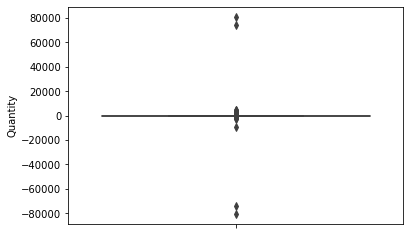

In [33]:
sns.boxplot(y='Quantity',data=df)

In [34]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Year,Day,TotalSales
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,December,2010,Wednesday,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,December,2010,Wednesday,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,December,2010,Wednesday,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,2010,Wednesday,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,2010,Wednesday,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,09:57:00,December,2011,Friday,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,10:28:00,December,2011,Friday,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,11:57:00,December,2011,Friday,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,11:58:00,December,2011,Friday,-1.25


### These are cancelled orders we can filter them out but before lets save them.

In [35]:
cancelled_df = df[df['Quantity']<0]

In [36]:
cancelled_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Year,Day,TotalSales
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,December,2010,Wednesday,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,December,2010,Wednesday,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,December,2010,Wednesday,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,2010,Wednesday,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,2010,Wednesday,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,09:57:00,December,2011,Friday,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,10:28:00,December,2011,Friday,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,11:57:00,December,2011,Friday,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,11:58:00,December,2011,Friday,-1.25


In [37]:
df = df[df['Quantity']>0]

In [38]:
df['Quantity'].min()

1

In [39]:
df.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Year,Day,TotalSales
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524872,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12:50:00,December,2011,Friday,10.20
524873,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12:50:00,December,2011,Friday,12.60
524874,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,December,2011,Friday,16.60
524875,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,December,2011,Friday,16.60


# 1) What is the best month for sales?

In [40]:
sales_2010_ = df[df['Year']==2010].groupby('Month')['TotalSales'].sum().reset_index()

In [41]:
sales_2010 =sales_2010_

In [42]:
sales_2011 = df[df['Year']==2011].groupby('Month')['TotalSales'].sum().reset_index()

In [43]:
sales_2011

,Month,TotalSales
0,April,536968.491
1,August,746779.320
2,December,637790.330
3,February,522545.560
4,January,689811.610
5,July,718076.121
6,June,760547.010
7,March,716215.260
8,May,769296.610
9,November,1503866.780


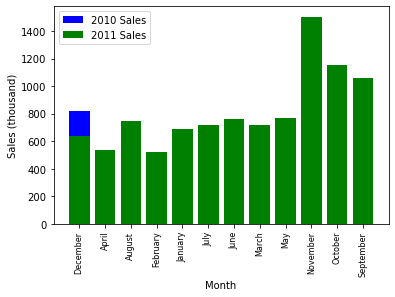

In [44]:
plt.bar(sales_2010["Month"],sales_2010['TotalSales']/1000, label='2010 Sales', color='blue')
plt.bar(sales_2011["Month"],sales_2011['TotalSales']/1000, label='2011 Sales', color='green')
plt.xticks(rotation = 'vertical',size = 8)
plt.ylabel("Sales (thousand)")
plt.xlabel("Month")
plt.legend()

### Best permforming month was of November 2011 and the next bests in line were October and September of 2011. On the contrary we see that February and April are the least performing months.

## 2) Best time to advertise / Busiest hours

In [45]:
df['Hour'] = df['InvoiceDate'].dt.hour

In [46]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Year,Day,TotalSales,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,2010,Wednesday,20.34,8


In [47]:
df_time = df.groupby('Hour').count().reset_index()
df_time

,Hour,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Year,Day,TotalSales
0,6,1,1,1,1,1,1,1,1,1,1,1,1,1
1,7,379,379,379,379,379,379,379,379,379,379,379,379,379
2,8,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797,8797
3,9,33684,33684,33684,33684,33684,33684,33684,33684,33684,33684,33684,33684,33684
4,10,47597,47597,47597,47597,47597,47597,47597,47597,47597,47597,47597,47597,47597
5,11,55420,55420,55420,55420,55420,55420,55420,55420,55420,55420,55420,55420,55420
6,12,75986,75986,75986,75986,75986,75986,75986,75986,75986,75986,75986,75986,75986
7,13,69993,69993,69993,69993,69993,69993,69993,69993,69993,69993,69993,69993,69993
8,14,65056,65056,65056,65056,65056,65056,65056,65056,65056,65056,65056,65056,65056
9,15,75665,75665,75665,75665,75665,75665,75665,75665,75665,75665,75665,75665,75665


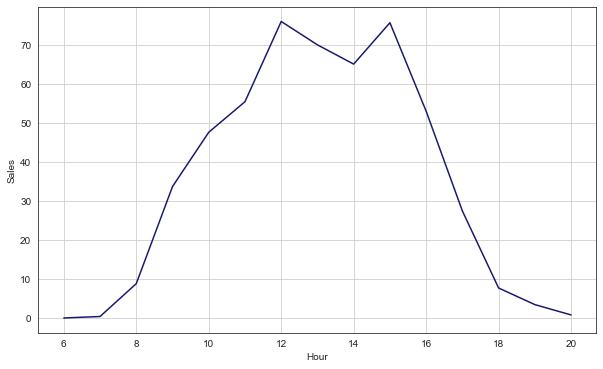

In [48]:
sns.set_style("white")
hours=np.array(df_time['Hour'])
sales=np.array(df_time['TotalSales'])
plt.figure(figsize=(10,6))
plt.plot(hours,sales/1000,
        color='midnightblue')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()

### According to the data, the ideal time for this e-commerce company to run ads is between 12PM and 3PM as this time period yields the highest sales. It is possible that this is because customers are more likely to be available during their break times and are more likely to use their mobile devices or computers during these hours.

## 3) What Products are most often sold together

In [49]:
soldTogether = df.groupby('InvoiceNo')['Description'].agg(lambda x: " , ".join(x)).reset_index()
soldTogether.head()

,InvoiceNo,Description
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER , WHITE MET..."
1,536366,"HAND WARMER UNION JACK , HAND WARMER RED POLKA..."
2,536367,"ASSORTED COLOUR BIRD ORNAMENT , POPPY'S PLAYHO..."
3,536368,"JAM MAKING SET WITH JARS , RED COAT RACK PARIS..."
4,536369,BATH BUILDING BLOCK WORD


In [50]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in soldTogether['Description']:
    row_list = row.split(",")
    #item mostly solved together , here it shows 2 items sold together,we can change it to 3
    #to show 3 items sold together and so on ...
    count.update(Counter(combinations(row_list,2)))
#most_common is method from collections
for key,value in count.most_common(10):
    print(key,value)

(' KEY FOB ', ' KEY FOB ') 743
(' KEY FOB ', ' BACK DOOR  ') 544
(' KEY FOB ', ' SHED ') 511
(' JUMBO BAG PINK POLKADOT ', ' JUMBO BAG RED RETROSPOT ') 477
(' KEY FOB ', ' FRONT  DOOR  ') 455
(' GREEN REGENCY TEACUP AND SAUCER ', ' ROSES REGENCY TEACUP AND SAUCER  ') 443
('COFFEE', 'SUGAR ') 432
(' JUMBO SHOPPER VINTAGE RED PAISLEY ', ' JUMBO BAG RED RETROSPOT ') 427
(' SET 3 RETROSPOT TEA', 'COFFEE') 426
(' SET 3 RETROSPOT TEA', 'SUGAR ') 414


### Analysis (Pair Products) : we can see that Key Fob are mostly sold with extra pair of Key Fob or with Back Door or with Shed. And so on... FeedBack : we can recommend our customer in buying these items while purchasing for one item, this way we can enhance sales.

## 4) What product sold the most ?

In [51]:
soldmost=df.groupby(['StockCode','Description'])['Quantity'].sum().reset_index()

In [52]:
soldmost = soldmost.sort_values('Quantity',ascending=False).head().reset_index()
soldmost

,index,StockCode,Description,Quantity
0,2668,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
1,2123,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,3128,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
3,3619,85099B,JUMBO BAG RED RETROSPOT,48371
4,3640,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37580


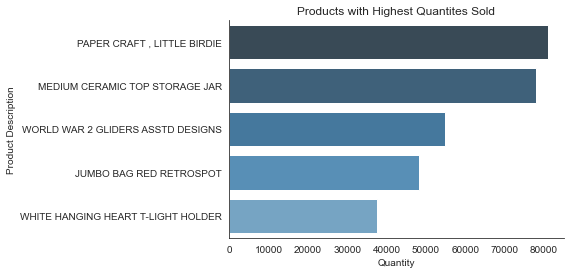

In [53]:
sns.set_style('white')
palette = sns.color_palette('Blues_d')
palette.reverse()
ax = sns.barplot(y = soldmost['Description'],
        x = soldmost['Quantity'],
        palette=palette)
plt.title('Products with Highest Quantites Sold')
plt.ylabel('Product Description')
sns.despine()

###  We can see that these items are sold the most from the company's website, out of them Paper Craft are sold most with approx 81k quantity.

## 5) Which countries have more customers?

In [54]:
len(df['CustomerID'].unique())

4339

In [55]:

df_cust_count= df.groupby('Country')['CustomerID'].count().reset_index()
df_cust_count.columns = ['Country','Customer Count']

In [57]:
df_cust_count.sort_values('Customer Count', ascending=False, inplace=True)

In [58]:
df_cc=df_cust_count.head()

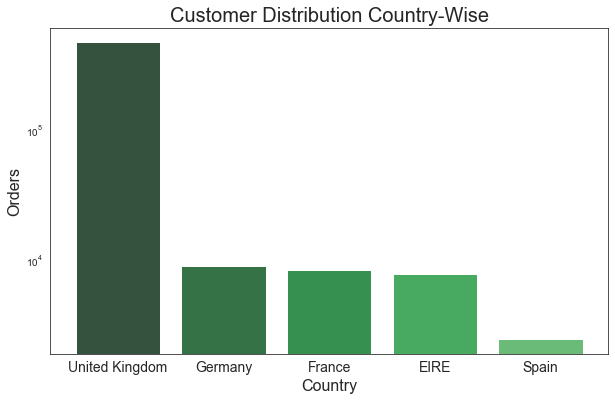

In [59]:
plt.figure(figsize=(10,6))
sns.set_style('white')
palette = sns.color_palette('Greens_d')
palette.reverse()
country=np.array(df_cc['Country'])
counts=np.array(df_cc['Customer Count'])
plt.bar(x=country,
        height=counts,
        color=palette)
plt.title("Customer Distribution Country-Wise",fontsize=20)
plt.ylabel("Orders",fontsize = 16)
plt.xlabel('Country',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yscale('log')

## Which day has more number of Sales?

In [60]:
daySales = df.groupby('Day').count()[['InvoiceNo']].reset_index()
daySales.columns = ['Day','Sales']
daySales.sort_values(by='Day',inplace=True)
daySales

,Day,Sales
0,Friday,79666
1,Monday,92466
2,Sunday,62339
3,Thursday,100213
4,Tuesday,98726
5,Wednesday,91467


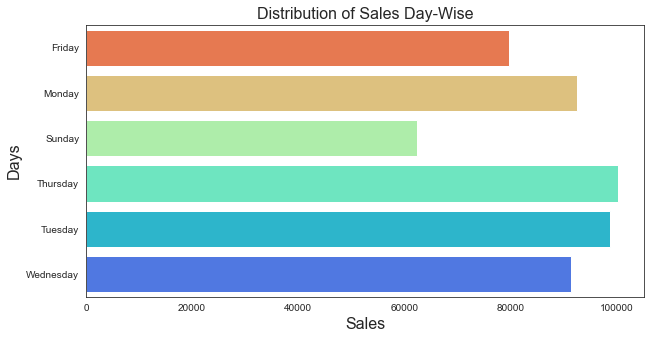

In [61]:
#Choosing Palette and reverse it
Palette = sns.color_palette('rainbow')
Palette.reverse()
plt.figure(figsize = (10,5))
#Visualizing
ax =sns.barplot(y = 'Day' , x= 'Sales' , data = daySales, palette = Palette)
#Setting Title
plt.title('Distribution of Sales Day-Wise',fontsize = 16)
plt.ylabel('Days',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.show()

## RFM Analysis

In [62]:
copy = data.copy()

In [63]:
#Ignoring Cancel orders
copy[~copy['InvoiceNo'].str.contains('C' ,na = False)]
#Dropping Null values in Customer ID column
copy= copy.dropna(subset= ['CustomerID'])
#Make Checkoutprice Column
copy['CheckoutPrice'] = copy['UnitPrice'] * copy['Quantity']
#Ignoring Debts
copy =copy[copy['UnitPrice']>0]

In [64]:
copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


In [65]:
#Dealing with datatypes
copy['InvoiceDate'] = pd.to_datetime(copy['InvoiceDate'],format='mixed',dayfirst=True)
copy['CustomerID'] = copy['CustomerID'].astype('int64')

In [66]:
recent_date = copy['InvoiceDate'].max()

In [67]:
recent_date

Timestamp('2011-12-09 12:50:00')

In [68]:
#Set our data to rfm Analysis
rfm = copy.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (recent_date - date.max()).days ,
'InvoiceNo' : lambda num :num.nunique() ,
'CheckoutPrice' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm

,InvoiceDate,InvoiceNo,CheckoutPrice
CustomerID,,,
12346,325,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,3,176.60


In [69]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [70]:
#Ignore 0 in Monatery so we will not need those customers in our analysis
rfm = rfm[rfm['Monetary']>0]

In [71]:

rfm['Recency_Score'] = pd.qcut(rfm['Recency'] ,5 , labels= [5,4,3,2,1])

In [72]:
rfm['Frequency_Score']=pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score
CustomerID,,,,,
12347,1,7,4310.00,5,4
12348,74,4,1797.24,2,3
12349,18,1,1757.55,4,1
12350,309,1,334.40,1,1
12352,35,11,1545.41,3,5
...,...,...,...,...,...
18280,277,1,180.60,1,2
18281,180,1,80.82,1,2
18282,7,3,176.60,5,3


In [73]:
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'] ,5 , labels= [1,2,3,4,5])

In [74]:
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
CustomerID,,,,,,
12347,1,7,4310.00,5,4,5
12348,74,4,1797.24,2,3,4
12349,18,1,1757.55,4,1,4
12350,309,1,334.40,1,1,2
12352,35,11,1545.41,3,5,4
...,...,...,...,...,...,...
18280,277,1,180.60,1,2,1
18281,180,1,80.82,1,2,1
18282,7,3,176.60,5,3,1


In [76]:
#Set RFM Score
rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) +
rfm['Monetary_Score'].astype(str) )

In [77]:
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
CustomerID,,,,,,,
12347,1,7,4310.00,5,4,5,545
12348,74,4,1797.24,2,3,4,234
12349,18,1,1757.55,4,1,4,414
12350,309,1,334.40,1,1,2,112
12352,35,11,1545.41,3,5,4,354
...,...,...,...,...,...,...,...
18280,277,1,180.60,1,2,1,121
18281,180,1,80.82,1,2,1,121
18282,7,3,176.60,5,3,1,531


In [78]:
#Our Customer Segmentation
seg_map = {
r'[1-2][1-2][1-5]': 'Hibernating',
r'[1-2][3-4][1-5]': 'At risk',
r'[1-2]5[1-5]' :'Cannot lose them',
r'3[1-2][1-5]' : 'About to sleep',
r'33[1-5]' : 'Need Attention',
r'[3-4][4-5][1-5]' : 'Loyal Customers',
r'[4-5][1-3][1-5]' : 'Good Potential',
r'5[4-5][1-5]' : 'Champions',
}
rfm['Segment'] = rfm['RFM_Score'] .replace(seg_map ,regex =True)

In [83]:
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12347,1,7,4310.00,5,4,5,545,Champions
12348,74,4,1797.24,2,3,4,234,At risk
12349,18,1,1757.55,4,1,4,414,Good Potential
12350,309,1,334.40,1,1,2,112,Hibernating
12352,35,11,1545.41,3,5,4,354,Loyal Customers
...,...,...,...,...,...,...,...,...
18280,277,1,180.60,1,2,1,121,Hibernating
18281,180,1,80.82,1,2,1,121,Hibernating
18282,7,3,176.60,5,3,1,531,Good Potential


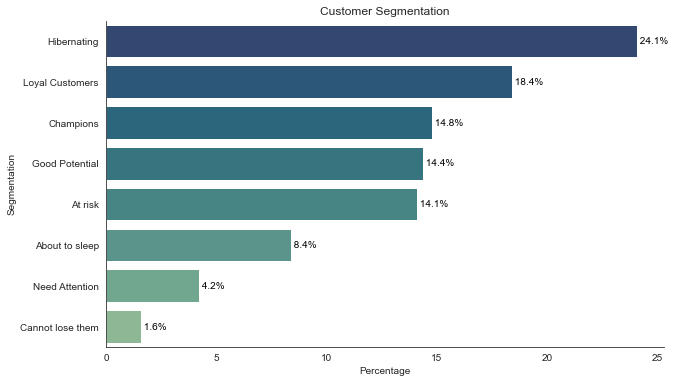

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of each segment
Segments = (rfm['Segment'].value_counts(normalize=True) * 100).reset_index()
Segments.columns = ['Segment', 'percentage']  # Rename columns for clarity
Segments = Segments.round(1)

# Create the bar plot
plt.figure(figsize=(10, 6))
b = sns.barplot(y='Segment', x='percentage', data=Segments, palette='crest_r')

# Add percentage labels to each bar
for i, v in enumerate(Segments['percentage']):
    b.text(v, i, f" {v:.1f}%", color='black', ha='left', va='center')

# Set plot labels and title
b.set_ylabel('Segmentation')
b.set_xlabel('Percentage')
b.set_title('Customer Segmentation')
sns.despine()


Findings

24.1% of our customers are in the hibernation segment and that for customers who have purchased from us a few times and the last time was a long time

18.4% of our customers are loyal and usually buys from us

14.8% of our customers are champions so we are their favourtie market

14.4% of our customers have good potential that refers to customers who have bought from us recently and have not buy many times

14.1% of our cutomeers are at risk segment so we must attract them again

8.4% of our customers are about to sleep and this segment of customers who last purchase from us for a fairly long time

4.2% of our customers are needing more attention to make them fall under Champions segment

1.6% of our customers can't loose them and they purchased from us many times but last time was for a long time